**Introduction**

Objective: Extraction of tweets and Perform sentiment analysis on the presidential candidature of Donald Trump, Joe Biden and Kanye West in the upcoming elections in US in November,2020.

In this project we've extracted tweets using Twitter's API, and GetOldTweets library to overcome the timeframe limitations of Twitter API. After extraction, we have done preprocessing for cleaning the datasets, basic EDA, sentiment analysis to observe polarity towards each candidate, used classification models on these sentiments and created visualisations.

Use of Natural Language Processing, Machine larning classification models,

 **Understanding the Dataset**

In this dataset, we have tweets by people ragarding the candidature of Joe Biden as the president for the upcoming elections in November 2020. 

Aim : to perform sentiment analysis on these tweets and predict a general reaction towards his candidature.

Importing Libraries

In [166]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import seaborn as sns 
import string
import os
import json
import datetime as dt
from collections import Counter
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

Importing dataset and reading the file

In [167]:
tweets = pd.read_csv(r'C:\Users\Sampada Bareja\Trump_Combined.csv')

In [168]:
tweets.head(5)

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets
0,2020-07-21 23:59:54,1285726226813014016,False,"You are amazing, @chicagosmayor. I hope you g...",rathacat,"Patterson, CA",Twitter Web App,1,2429,3710,0
1,2020-07-21 23:59:51,1285726213001093127,False,#Trump finally admitted that the spread of the...,Nor_Kan_1965,NaN,Twitter for Android,1,112,73,1
2,2020-07-21 23:59:30,1285726126820794368,False,@NavygirlLaura @GOP A sure sign the #GOP party...,ShannsolSolberg,"Texas, USA",Twitter for iPhone,1,1359,1745,0
3,2020-07-21 23:59:20,1285726083455877121,False,Why is #Trump silent when cops beat a #Veteran...,in_pubs,NJ-DC-NY-🌍,Twitter for iPhone,650,78851,17726,254
4,2020-07-21 23:58:51,1285725963024818183,False,"@gtconway3d Speaking of falling, please be car...",dfwcitizen,• GOD BLESS AMERICA •,Twitter for iPhone,2,5333,375,0


In [169]:
tweets.info() #gives the columnwise info of the data like datatype, nature of entry (null/not null),etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47652 entries, 0 to 47651
Data columns (total 11 columns):
Date         47652 non-null object
Tweet_id     47652 non-null int64
Verified     47652 non-null bool
Tweet        47652 non-null object
User         47652 non-null object
Location     34414 non-null object
Source       47650 non-null object
Likes        47652 non-null int64
Followers    47652 non-null int64
Following    47652 non-null int64
Retweets     47652 non-null int64
dtypes: bool(1), int64(5), object(5)
memory usage: 3.7+ MB


In [170]:
tweets.shape

(47652, 11)

 The dataset Contains 47652 rows and 11 Columns.

In [171]:
tweets.describe() 

,Tweet_id,Likes,Followers,Following,Retweets
count,4.765200e+04,47652.000000,4.765200e+04,47652.000000,47652.000000
mean,1.284343e+18,6.437610,1.087270e+04,2845.463506,2.391442
std,9.123231e+14,208.995361,2.482166e+05,9375.136948,78.189956
min,1.283023e+18,0.000000,0.000000e+00,0.000000,0.000000
25%,1.283427e+18,0.000000,1.070000e+02,198.000000,0.000000
50%,1.284272e+18,0.000000,5.770000e+02,778.000000,0.000000
75%,1.285316e+18,1.000000,2.569000e+03,2728.250000,0.000000
max,1.285726e+18,36213.000000,1.389605e+07,630285.000000,13732.000000


Here we have the statistical summary of our data i.e. only about columns with numeric values.

In [172]:
tweets.Verified.value_counts()

False    46788
True       864
Name: Verified, dtype: int64

There are 864 verified accounts.

**Data Preprocessing**
Removing the unwanted characters, numbers, punctuations, urls, emojis, omitting stopwords and obtaining root words.

In [173]:
#removing unnecessary special characters, numbers, punctuations in a new column called clean tweets
tweets['clean_tweets'] = tweets.Tweet.str.replace("[^a-zA-Z]", " ")


In [174]:
#converting into lower case 
tweets.Tweet = [low.lower() for low in tweets.Tweet]


In [175]:
#removing urls

tweets.Tweet = tweets.Tweet.apply(lambda x: re.sub(r"https\S+", "", str(x)))


In [176]:
#removing emojis
def noemoji(Tweet):
    emojis = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',Tweet)
    Tweet = re.sub('[\W]+',' ', Tweet.lower()) +\
    ' '.join(emojis).replace('-','')
     
    return Tweet
    
tweets.Tweet=tweets.Tweet.apply(noemoji)

tweets.Tweet.head(5)

0    you are amazing chicagosmayor i hope you get a...
1     trump finally admitted that the spread of the...
2     navygirllaura gop a sure sign the gop party i...
3    why is trump silent when cops beat a veteran a...
4     gtconway3d speaking of falling please be care...
Name: Tweet, dtype: object

In [177]:
tweets['Source'].value_counts()

Twitter Web App        17539
Twitter for iPhone     13156
Twitter for Android    10024
Twitter for iPad        2327
TweetDeck                816
                       ...  
chirr.app                  1
diagonals                  1
tvpunjab                   1
OS X                       1
mehabe                     1
Name: Source, Length: 204, dtype: int64

This shows the sources and the frequency of each one of them used by people to tweet. Max no is from web application followed by iphone, android, ipad, tweetdeck and so on.

In [178]:
count = 0    #checking for retweets
for i in tweets['Tweet']:
    if re.match(r'^RT', i):  
        df.drop(df.loc[tweets['Tweet']==i].index,inplace = True)
        count+=1
    
count

0

The output shows that there are no retweets in this as we had eliminated them at the time of extraction.

**Removing stopwords**

Stop words are words that do not add much to the sentiment and can be ignored.


In [179]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['when', 'have', "aren't", 'itself', 'through', 'by', "it's", 'on', 'where', "should've", 'yours', "don't", 'from', 'isn', 'were', 'before', 'you', 'won', 'having', 'do', 'does', 'at', "mightn't", 'just', 'doing', 'up', 'above', 'mustn', 'ain', "wouldn't", 'not', 'so', 'whom', 'didn', 'or', 'as', 'after', 'her', 'd', 'aren', "isn't", 'while', 'once', "weren't", 'but', "you'll", 'ourselves', 'this', 'which', 'these', 'ours', 'too', "shouldn't", 'here', 'himself', 'will', 'below', 're', 'why', "she's", 'our', 'such', 'very', "hasn't", 'shouldn', 'me', 'to', "you'd", 'only', 'are', 'was', 'how', 'more', 'nor', 'hadn', 'both', 'has', 'yourself', 'those', 'hers', 'all', 'm', 'myself', 'own', 'their', 'been', "mustn't", 'most', 'into', 'there', 'then', "doesn't", 'between', "you're", 'being', 'down', 'its', 'few', 'themselves', 'should', 'in', "shan't", 'it', 'again', 'mightn', 'your', 'am', 'further', 'them', 'no', 'y', "didn't", 'is', 'what', 'than', 'now', 'my', "needn't", 'who', 'yoursel

In [180]:
tweets['Tweet'] = tweets.Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words)) 

In [181]:
tweets['Tweet']

0        amazing chicagosmayor hope get support need re...
1        trump finally admitted spread coronavirus get ...
2        navygirllaura gop sure sign gop party breaking...
3        trump silent cops beat veteran put hospital bl...
4        gtconway3d speaking falling please careful cli...
                               ...                        
47647    looks like borisjohnson pandering trump ready ...
47648    us map must look like november 3rd like agree ...
47649    thehill death count 7 14 countries took prompt...
47650    human one possess empathy moral daniel lewis l...
47651    douglas london former cia senior operations of...
Name: Tweet, Length: 47652, dtype: object

In [222]:
verified = tweets.query('Verified == True')

In [223]:
verified['User'].value_counts()

Cairo67Unedited    43
AndyOstroy         39
alana_austin       27
DeeTwoCents        24
Rasmussen_Poll     21
                   ..
loriacarter         1
NewsMobileIndia     1
nickoza1            1
rosswilsonmusic     1
DonnaLeinwand       1
Name: User, Length: 323, dtype: int64

Max no of tweets are by a user named Cairo67Unedited. 

**Tokenizing**

Breaking down the text into smaller units. Here, we are tokenizing into words.

In [182]:
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: word_tokenize(x))

In [183]:
tweets['Tweet']

0        [amazing, chicagosmayor, hope, get, support, n...
1        [trump, finally, admitted, spread, coronavirus...
2        [navygirllaura, gop, sure, sign, gop, party, b...
3        [trump, silent, cops, beat, veteran, put, hosp...
4        [gtconway3d, speaking, falling, please, carefu...
                               ...                        
47647    [looks, like, borisjohnson, pandering, trump, ...
47648    [us, map, must, look, like, november, 3rd, lik...
47649    [thehill, death, count, 7, 14, countries, took...
47650    [human, one, possess, empathy, moral, daniel, ...
47651    [douglas, london, former, cia, senior, operati...
Name: Tweet, Length: 47652, dtype: object

**Stemming & Lemmatization**

Stemming and lemmatization are both process of obtaining root words from their other forms to narrow down the word cloud. Lemmatization always generates and actual word, whereas output of stemming may not be an actual word, although stemming follows an algorithm with steps which makes it faster.

In [184]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Sampada
[nltk_data]     Bareja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [185]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

In [186]:
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x])

In [224]:
tweets['Tweet'] 


0        [amaz, chicagosmayor, hope, get, support, need...
1        [trump, final, admit, spread, coronaviru, get,...
2        [navygirllaura, gop, sure, sign, gop, parti, b...
3        [trump, silent, cop, beat, veteran, put, hospi...
4        [gtconway3d, speak, fall, pleas, care, climb, ...
                               ...                        
47647    [look, like, borisjohnson, pander, trump, read...
47648    [us, map, must, look, like, novemb, 3rd, like,...
47649    [thehil, death, count, 7, 14, countri, take, p...
47650    [human, one, possess, empathi, moral, daniel, ...
47651    [dougla, london, former, cia, senior, oper, of...
Name: Tweet, Length: 47652, dtype: object

**EDA**

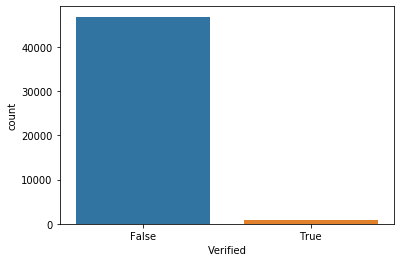

In [188]:
p = sns.countplot(tweets['Verified'])

The graph depicts the huge difference between verified and non-verified accounts.

In [194]:
import sys
print(sys.executable)

C:\Users\Sampada Bareja\Anaconda3\python.exe


**SENTIMENT ANALYSIS**

In [204]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(ngram_range=(1,1), max_features=100).fit(tweets) #defining vector
X_txt = vect.transform(tweets) #transforming the vectorizer
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names())
X.head(5)

,clean_tweets,date,followers,following,likes,location,retweets,source,tweet,tweet_id,user,verified
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Converting the tweets into strings.

In [231]:
texts = [] 
texts = tweets.Tweet.apply(lambda x: [i for i in x] )

In [232]:
all_words = []
for i in texts:
    all_words.append(" ".join(i))

In [233]:
text = []
for i in texts:
    for j in i:
        text.append(j)

In [234]:
len(text)

800882

**WORDCLOUD**

In [243]:
!python -m pip install wordcloud

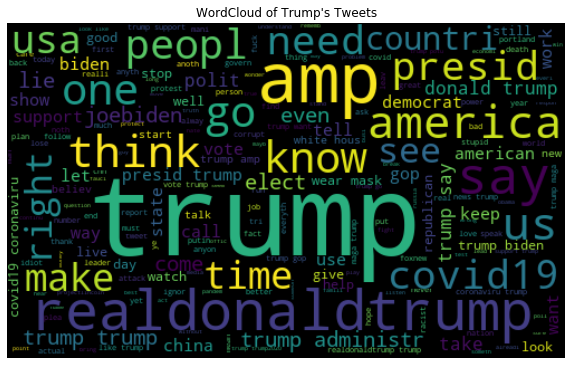

In [246]:
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=100).generate(' '.join(text))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("WordCloud of Trump's Tweets")
plt.show()

Thus we got the wordcloud of Trump's tweets.

**Generating the polarity of the tweets**

In [241]:
 !pip install -U textblob
 !python -m textblob.download_corpora

Requirement already up-to-date: textblob in c:\users\sampada bareja\anaconda3\lib\site-packages (0.15.3)
Finished.


[nltk_data] Downloading package brown to C:\Users\Sampada
[nltk_data]     Bareja\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Sampada
[nltk_data]     Bareja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sampada
[nltk_data]     Bareja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sampada Bareja\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to C:\Users\Sampada
[nltk_data]     Bareja\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to C:\Users\Sampada
[nltk_data]     Bareja\AppData\Roaming\nltk_data...
[nlt

In [213]:
from textblob import TextBlob 

In [235]:
 
polarity=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    polarity.append(blob.sentiment.polarity)
    

In [237]:
len(polarity)

47652

In [238]:
tweets['Tweet']

0        [amaz, chicagosmayor, hope, get, support, need...
1        [trump, final, admit, spread, coronaviru, get,...
2        [navygirllaura, gop, sure, sign, gop, parti, b...
3        [trump, silent, cop, beat, veteran, put, hospi...
4        [gtconway3d, speak, fall, pleas, care, climb, ...
                               ...                        
47647    [look, like, borisjohnson, pander, trump, read...
47648    [us, map, must, look, like, novemb, 3rd, like,...
47649    [thehil, death, count, 7, 14, countri, take, p...
47650    [human, one, possess, empathi, moral, daniel, ...
47651    [dougla, london, former, cia, senior, oper, of...
Name: Tweet, Length: 47652, dtype: object

In [257]:
positive=0  #classifying into positive, negative and neutral
negative=0
neutral=0
for i in polarity:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 15878
Negative Tweets: 11410
Neutral Tweets 20364


In [250]:
!pip install vaderSentiment

In [251]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sia.polarity_scores(i)])

In [252]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))


In [253]:
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.000,0.663,0.337,0.6808
1,0.000,0.723,0.277,0.7096
2,0.147,0.756,0.097,-0.2960
3,0.101,0.754,0.146,0.2263
4,0.000,0.842,0.158,0.4939
...,...,...,...,...
47647,0.000,0.815,0.185,0.3612
47648,0.000,0.750,0.250,0.6124
47649,0.253,0.678,0.069,-0.8957
47650,0.000,1.000,0.000,0.0000


In [254]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.000,0.663,0.337,0.6808,Positive
1,0.000,0.723,0.277,0.7096,Positive
2,0.147,0.756,0.097,-0.2960,Negative
3,0.101,0.754,0.146,0.2263,Positive
4,0.000,0.842,0.158,0.4939,Positive


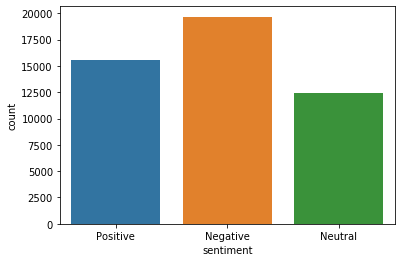

In [261]:
sen_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sen_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sen_count)